## Chapter 10. 케라스를 사용한 인공 신경망 소개

### 10.1 생물학적 뉴런에서 인공 뉴런까지

#### 퍼셉트론

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import warnings; warnings.filterwarnings('ignore')

iris = load_iris()
X = iris.data[:, (2, 3)] # 꽃잎의 길이와 너비
y = (iris.target == 0).astype(np.int) # 부채붓꽃(Iris Setosa)인가?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

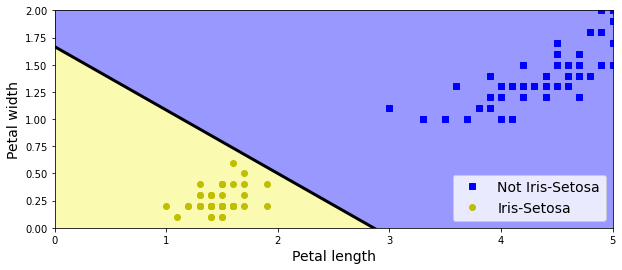

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

### 10.2 케라스로 다층 퍼셉트론 구현하기

In [3]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.8.0'

In [4]:
# tf.keras 에서 구현된 케라스 API 버젼 -tf 접미사는 tf.keras가 텐서플로 특화된 기능이 추가되어 케라스 API를 구현했다는 것을 나타냄
keras.__version__

'2.8.0'

In [5]:
# 케라스를 사용해 데이터셋 적재하기
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

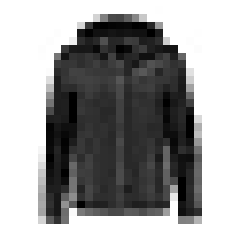

In [9]:
# matplotlib.pyplot 의 imshow() 함수와 'binary' 컬러맵을 사용해 이미지 출력  가능
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [10]:
# 0~9 까지 클래스 아이디
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
# 첫 이미지는 코트
class_names[y_train[0]]

'Coat'

#### 시퀀셜 API를 사용해 모델 만들기

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [17]:
model.layers

In [18]:
hidden_1 = model.layers[1]
hidden_1.name

'dense_3'

In [19]:
model.get_layer('dense_3') is hidden_1

True

In [20]:
weights, biases = hidden_1.get_weights()
weights

array([[-0.00900263,  0.04272863, -0.04711238, ..., -0.05374917,
        -0.00437523, -0.04172974],
       [-0.00654906,  0.01875776, -0.06586118, ...,  0.04730989,
        -0.05571219,  0.0548614 ],
       [ 0.04404957,  0.03006719,  0.06051371, ..., -0.01007503,
         0.01528049, -0.06216595],
       ...,
       [ 0.03087259,  0.01648729, -0.06382301, ...,  0.04749279,
        -0.06610171,  0.02856842],
       [-0.00807952,  0.05528942, -0.02437977, ...,  0.01897026,
         0.03872108,  0.06538887],
       [-0.01073142,  0.06068146, -0.04091919, ...,  0.04069037,
         0.04296832, -0.04729627]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
biases.shape

(300,)

#### 모델 컴파일

In [24]:
model.compile(loss = 'sparse_categorical_crossentropy',
            optimizer = 'sgd',
            metrics = ['accuracy'])

#### 모델 훈련과 평가

In [25]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7238 - accuracy: 0.7623 - val_loss: 0.5201 - val_accuracy: 0.8270
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4897 - accuracy: 0.8292 - val_loss: 0.4711 - val_accuracy: 0.8332
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4463 - accuracy: 0.8425 - val_loss: 0.4339 - val_accuracy: 0.8558
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4183 - accuracy: 0.8519 - val_loss: 0.4272 - val_accuracy: 0.8584
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3975 - accuracy: 0.8607 - val_loss: 0.4102 - val_accuracy: 0.8542
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3835 - accuracy: 0.8642 - val_loss: 0.3703 - val_accuracy: 0.8688
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3687 - accuracy: 0.8693 - val_loss: 0.3816 - val_accuracy:

In [26]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [27]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

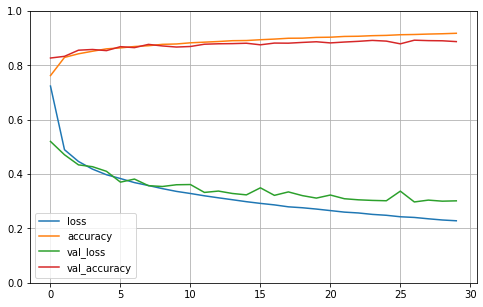

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # 수직축 범위를 [0-1] 사이로 설정
plt.show()

In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3328 - accuracy: 0.8816


[0.3328465521335602, 0.881600022315979]

#### 모델을 사용해 예측을 만들기

In [31]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [32]:
# 모델이 예측한 정답
np.argmax(y_proba, axis=1)

array([9, 2, 1], dtype=int64)

In [33]:
np.array(class_names)[np.argmax(y_proba, axis=1)]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [34]:
# 실제 정답
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

#### 시퀀셜 API를 사용해 회귀용 다층 퍼셉트론 만들기

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [36]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20,
                    validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # 새로운 샘플
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9844 - val_loss: 0.8635
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5919 - val_loss: 0.5399
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4757 - val_loss: 0.5138
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4518 - val_loss: 0.4949
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4665 - val_loss: 0.4840
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4308 - val_loss: 0.4708
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4245 - val_loss: 0.4899
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4176 - val_loss: 0.4568
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4115 - val_loss: 0.4522
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4049 - val_loss: 0.4484

#### 함수형 API를 사용해 복잡한 모델 만들기

In [37]:
# 함수형 API

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

# Sequential API

# model = keras.models.Sequential([
#    keras.layers.Flatten(input_shape=[28, 28]),
#    keras.layers.Dense(300, activation='relu'),
#    keras.layers.Dense(100, activation='relu'),
#    keras.layers.Dense(10, activation='softmax')
# ])

In [38]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 30)           930         ['dense_8[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_9[0][0]']            

In [39]:
# 다중 입력 다루기

# 특성 0에서 4까지 5개의 특성을 와이드 경로에 보내고
# 특성 2에서 7까지 6개의 특성을 딥 경로로 전달, 3개의 특성 (특성 2, 3, 4)는 양쪽에 모두 전달 됨
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [40]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 2.4818 - val_loss: 1.1341
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8815 - val_loss: 0.8086
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7216 - val_loss: 0.7341
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6659 - val_loss: 0.6946
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6330 - val_loss: 0.6673
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6090 - val_loss: 0.6474
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5903 - val_loss: 0.6304
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5746 - val_loss: 0.6161
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5620 - val_loss: 0.6052
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5511 - val_loss: 0.5957

In [41]:
# 규제를 위한 보조 출력 추가하기

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [42]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [43]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.5238 - main_output_loss: 2.3991 - aux_output_loss: 3.6461 - val_loss: 1.2832 - val_main_output_loss: 1.0918 - val_aux_output_loss: 3.0055
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 1.0219 - main_output_loss: 0.8601 - aux_output_loss: 2.4784 - val_loss: 0.9622 - val_main_output_loss: 0.8160 - val_aux_output_loss: 2.2779
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8405 - main_output_loss: 0.7154 - aux_output_loss: 1.9665 - val_loss: 0.8491 - val_main_output_loss: 0.7338 - val_aux_output_loss: 1.8865
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7621 - main_output_loss: 0.6603 - aux_output_loss: 1.6777 - val_loss: 0.7949 - val_main_output_loss: 0.6989 - val_aux_output_loss: 1.6588
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7169 - main_output_loss: 0.6295 - aux_output_loss: 1.5043 - val_loss

In [44]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 2ms/step - loss: 0.5549 - main_output_loss: 0.5077 - aux_output_loss: 0.9802


#### 서브클래싱 API로 동적 모델 만들기

In [45]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # 표준 매개변수를 처리함 (예를 들어, name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [46]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 3.3682 - output_1_loss: 3.0897 - output_2_loss: 5.8746 - val_loss: 1.9422 - val_output_1_loss: 1.5068 - val_output_2_loss: 5.8610
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 1.3370 - output_1_loss: 0.9428 - output_2_loss: 4.8851 - val_loss: 1.2022 - val_output_1_loss: 0.8431 - val_output_2_loss: 4.4346
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 1.0281 - output_1_loss: 0.7344 - output_2_loss: 3.6720 - val_loss: 1.0103 - val_output_1_loss: 0.7509 - val_output_2_loss: 3.3442
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.8938 - output_1_loss: 0.6807 - output_2_loss: 2.8125 - val_loss: 0.9048 - val_output_1_loss: 0.7134 - val_output_2_loss: 2.6274
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.8031 - output_1_loss: 0.6418 - output_2_loss: 2.2549 - val_loss: 0.8286 - val_output_1_loss: 0.6793 - val_ou

#### 저장과 복원

In [47]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.2236 - val_loss: 1.1525
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8500 - val_loss: 0.7467
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6691 - val_loss: 0.6826
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6219 - val_loss: 0.6469
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5897 - val_loss: 0.6171
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5654 - val_loss: 0.5986
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5450 - val_loss: 0.5833
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5283 - val_loss: 0.5676
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5148 - val_loss: 0.5550
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.5021


In [48]:
model.save("./keras/my_keras_model.h5")
model = keras.models.load_model("./keras/my_keras_model.h5")

In [49]:
model.predict(X_new)

array([[2.601483 ],
       [1.8697193],
       [3.9253507]], dtype=float32)

In [50]:
model.save_weights("./keras/my_keras_weights.ckpt")
model.load_weights("./keras/my_keras_weights.ckpt")

#### 콜백 사용하기

In [51]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [52]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("./keras/my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("./keras/my_keras_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.1715 - val_loss: 1.0318
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7715 - val_loss: 0.7183
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6238 - val_loss: 0.6384
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5748 - val_loss: 0.6050
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5463 - val_loss: 0.5799
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5278 - val_loss: 0.5656
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5128 - val_loss: 0.5529
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5032 - val_loss: 0.5442
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4943 - val_loss: 0.5371
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4883


In [53]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4805 - val_loss: 0.5274
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4765 - val_loss: 0.5216
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4716 - val_loss: 0.5207
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4674 - val_loss: 0.5153
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4643 - val_loss: 0.5162
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4603 - val_loss: 0.5114
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4584 - val_loss: 0.5080
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4548 - val_loss: 0.5081
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4524 - val_loss: 0.5046
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4498 - val_lo

In [54]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [55]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

342/363 [===========================>..] - ETA: 0s - loss: 0.3601
val/train: 1.12
363/363 [==============================] - 1s 2ms/step - loss: 0.3585 - val_loss: 0.4033


#### 텐서보드(TensorBoard)

In [56]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2023_01_31-17_39_24'

In [57]:
os.curdir

'.'

In [58]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.7606 - val_loss: 0.8938
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7660 - val_loss: 0.7384
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6771 - val_loss: 0.6912
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6384 - val_loss: 0.6614
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6108 - val_loss: 0.6415
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5884 - val_loss: 0.6215
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5693 - val_loss: 0.6035
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5532 - val_loss: 0.5900
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5390 - val_loss: 0.5783
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5268 - val_loss: 0.5673

TensorBoard 실행  
- 텐서보드 설치된 가상환경 활성화
- 노트북 디렉토리로 이동하여 다음 명령 입력
- tensorboard --logdir=./my_logs --port=6006  

그다음 웹 브라우저를 열고 localhost:6006에 접속하면 텐서보드를 사용할 수 있음

In [ ]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # 몇몇 랜덤 데이터
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # 32 * 32 RGB 이미지
        tf.summary.image('my_images', images * step / 1000, step=step)
        texts = ["The step is" + str(step), "Its square is", str(step**2)]
        tf.summary.text('my_text', texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000)/48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio('my_audio', audio, sample_rate=48000, step=step)

### 10.3 신경망 하이퍼파라미터 튜닝하기

In [59]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [60]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [61]:
keras_reg.fit(X_train, y_train, epochs=100,
            validation_data = (X_valid, y_valid),
            callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.1364 - val_loss: 0.7597
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6791 - val_loss: 0.6618
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5883 - val_loss: 0.5950
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5310 - val_loss: 0.5590
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4984 - val_loss: 0.5296
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4771 - val_loss: 0.5128
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4645 - val_loss: 0.5029
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4576 - val_loss: 0.4979
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4496 - val_loss: 0.4898
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4438 - val_lo

In [62]:
y_pred = keras_reg.predict(X_new)

In [63]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                validation_data=(X_valid, y_valid),
                callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8399 - val_loss: 0.6266
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5227 - val_loss: 0.5344
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4602 - val_loss: 0.5524
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4231 - val_loss: 0.4818
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4075 - val_loss: 0.4658
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4028 - val_loss: 0.4562
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3866 - val_loss: 0.4419
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3796 - val_loss: 0.4407
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3725 - val_loss: 0.4300
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3684 - val_lo

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000024ED63FB040>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024ED6651B80>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [64]:
rnd_search_cv.best_params_

{'learning_rate': 0.008453461204835444, 'n_hidden': 3, 'n_neurons': 58}

In [65]:
rnd_search_cv.best_score_

-0.3567943871021271

In [66]:
model = rnd_search_cv.best_estimator_.model